In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import KNNImputer
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [3]:
df = pd.read_csv("/workspaces/machine-learning-python-template/data/raw/AB_NYC_2019.csv")
df.shape
df.info

<bound method DataFrame.info of              id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

       

In [4]:
df.isna().sum().sort_values(ascending= False)

last_review                       10052
reviews_per_month                 10052
host_name                            21
name                                 16
id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [5]:
df.drop(["id", "name", "host_id", "host_name", "reviews_per_month", "last_review"], inplace= True, axis=1)

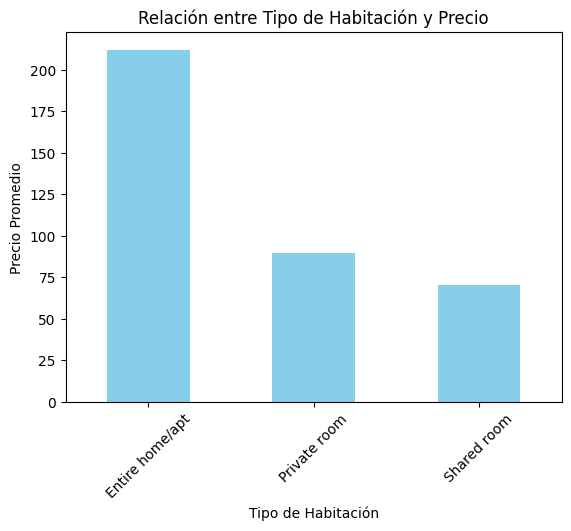

In [6]:
# Agrupar los datos por tipo de habitación y calcular el precio promedio para cada grupo
room_type_prices = df.groupby('room_type')['price'].mean()
# Crear un gráfico de barras para visualizar la relación
room_type_prices.plot(kind='bar', color='skyblue')
plt.xlabel('Tipo de Habitación')
plt.ylabel('Precio Promedio')
plt.title('Relación entre Tipo de Habitación y Precio')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mayor legibilidad
plt.show()

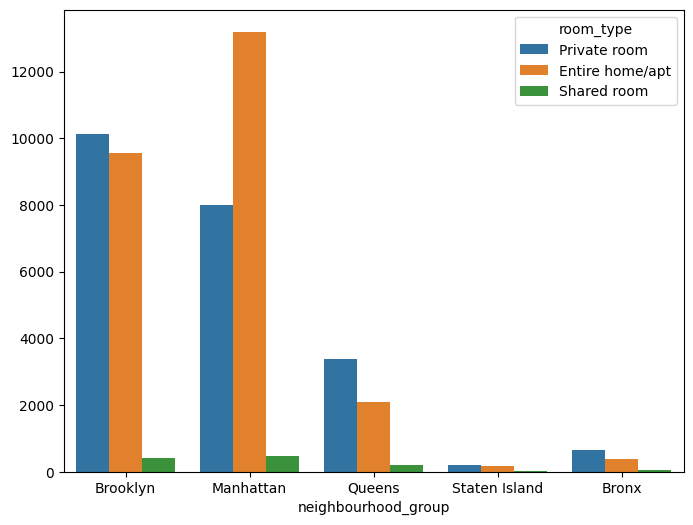

In [7]:
# ROOM TYPES IN THE NEIRBOURHOOD
fig , axis = plt.subplots(figsize=(8,6))
sns.countplot(ax=axis , data=df, x='neighbourhood_group', hue='room_type')
axis.set_ylabel(None)
plt.show()

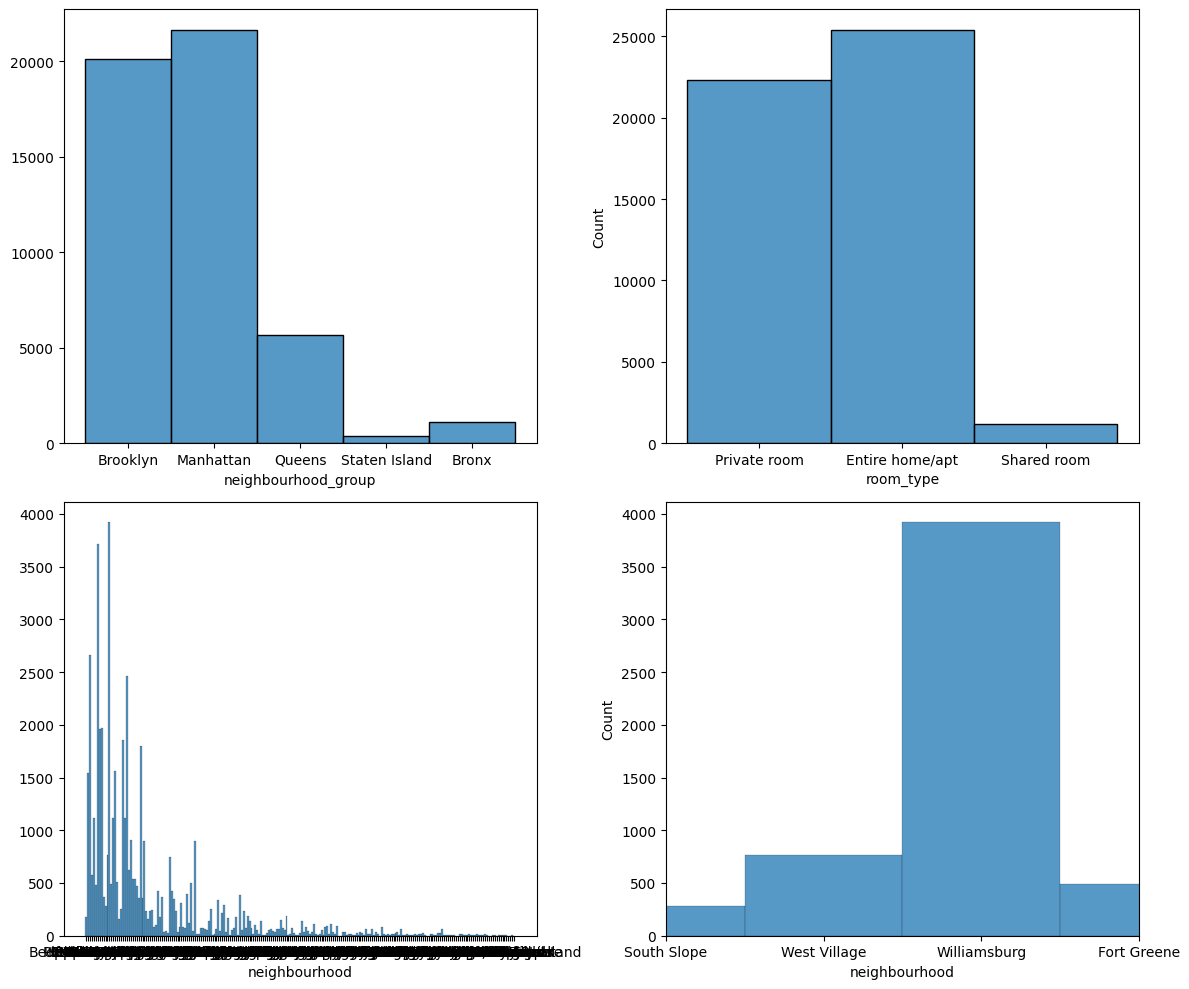

In [8]:
fig, axis = plt.subplots(2 , 2, figsize = (12,10))

sns.histplot(ax = axis[0,0], data = df, x = 'neighbourhood_group').set(ylabel = None)
sns.histplot(ax = axis[0,1], data = df, x = 'room_type')
sns.histplot(ax = axis[1,0], data = df, x = 'neighbourhood').set(ylabel = None)
sns.histplot(ax = axis[1,1], data = df, x = 'neighbourhood').set_xlim(10,13)

plt.tight_layout()

plt.show()

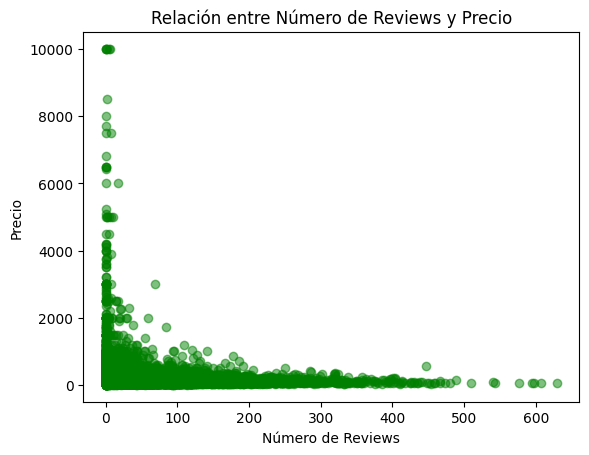

In [9]:
# Crear un gráfico de dispersión para visualizar la relación entre número de revisiones y precio
plt.scatter(df['number_of_reviews'], df['price'], alpha=0.5, color='green')
plt.xlabel('Número de Reviews')
plt.ylabel('Precio')
plt.title('Relación entre Número de Reviews y Precio')
plt.show()

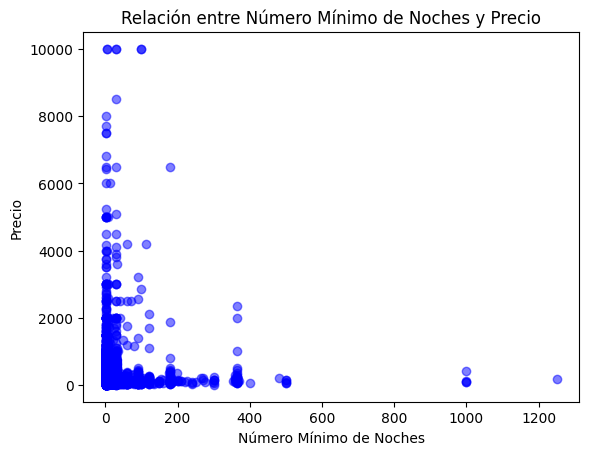

In [10]:
plt.scatter(df['minimum_nights'], df['price'], alpha=0.5, color='blue')
plt.xlabel('Número Mínimo de Noches')
plt.ylabel('Precio')
plt.title('Relación entre Número Mínimo de Noches y Precio')
plt.show()

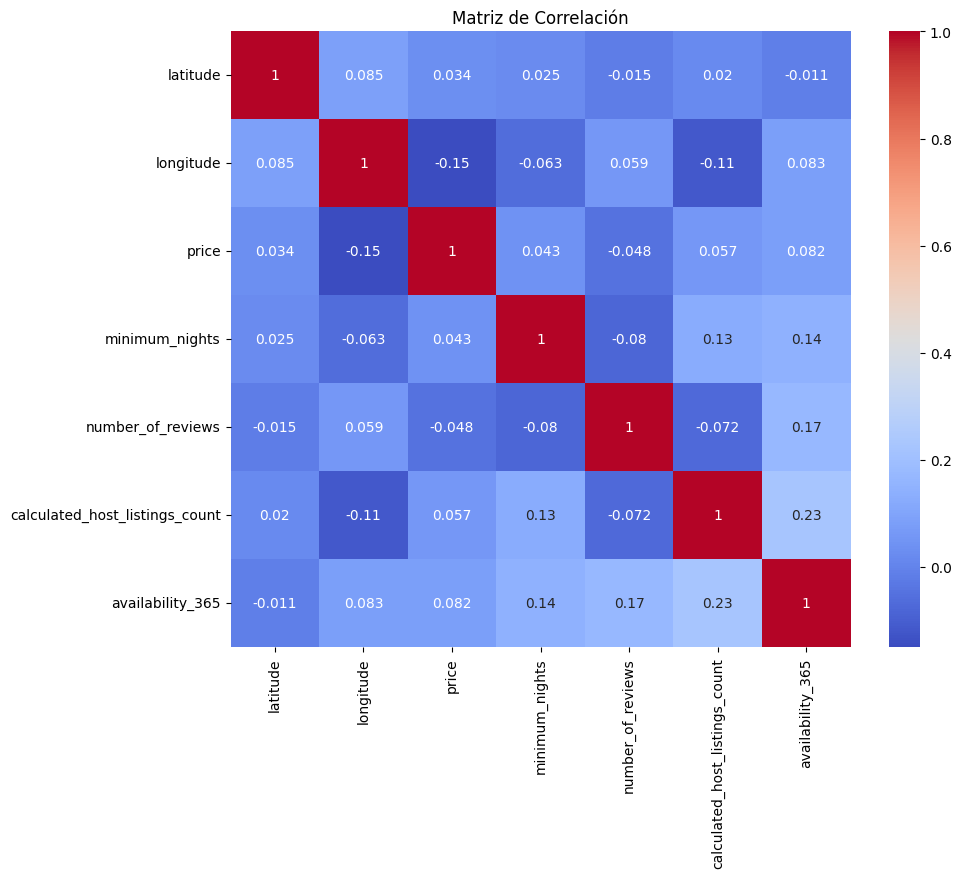

In [11]:
numerical_columns = df.select_dtypes(include=[np.number])
# Calcular la matriz de correlación
correlation_matrix = numerical_columns.corr()
# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


CREATE NEW COLUMN, PARTICULAR OR COMPANY BASED ON NUMBER OF PROPERTIES OWNED

In [12]:
df['particular_or_no'] = df['calculated_host_listings_count'].apply(lambda x: 'Particular' if x <= 5 else 'Company')

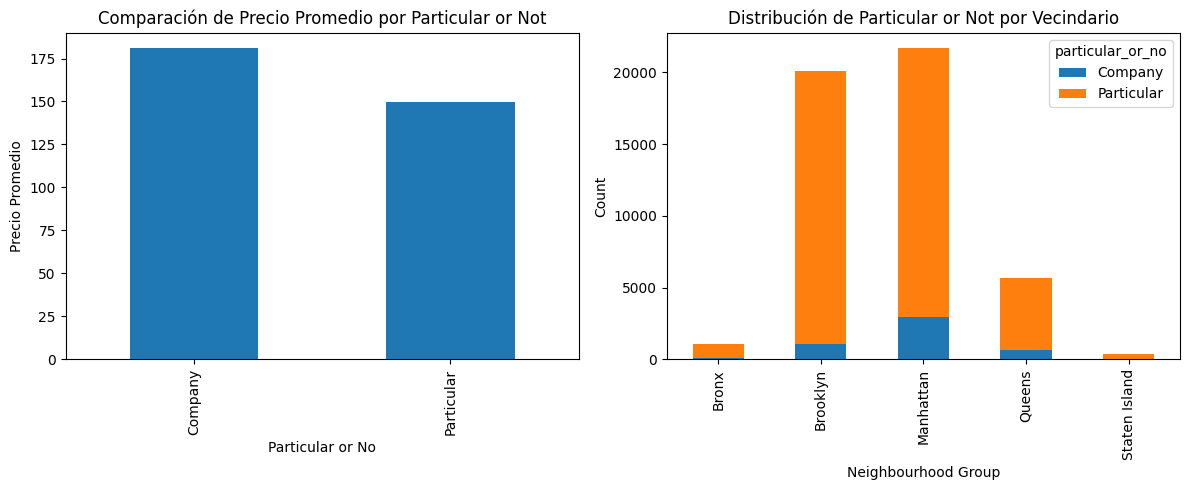

In [13]:
data_grouped1 = df.groupby('particular_or_no')['price'].mean()

data_grouped2 = df.groupby(['neighbourhood_group', 'particular_or_no']).size().unstack()

# Crear subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 fila y 2 columnas

# Gráfica 1
data_grouped1.plot(kind='bar', ax=axes[0])
axes[0].set_title('Comparación de Precio Promedio por Particular or Not')
axes[0].set_xlabel('Particular or No')
axes[0].set_ylabel('Precio Promedio')

# Gráfica 2
data_grouped2.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Distribución de Particular or Not por Vecindario')
axes[1].set_xlabel('Neighbourhood Group')
axes[1].set_ylabel('Count')

plt.tight_layout()  # Para evitar superposición de etiquetas
plt.show()

In [14]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


In [16]:
df.columns

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365',
       'particular_or_no'],
      dtype='object')